# Unsupervised Learning using KMeans Clustering

## Problem Statement

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## Aim:

To create groups of countries based on their socio-economic factors to help in deciding on the recipents of the financial aid.

**Importing Python Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the data using pandas**

In [2]:
df = pd.read_csv('data/Country-data.csv')

In [3]:
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

**Checking for missing data and performing exploitary data analysis**

In [4]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [7]:
df.duplicated().sum()

0

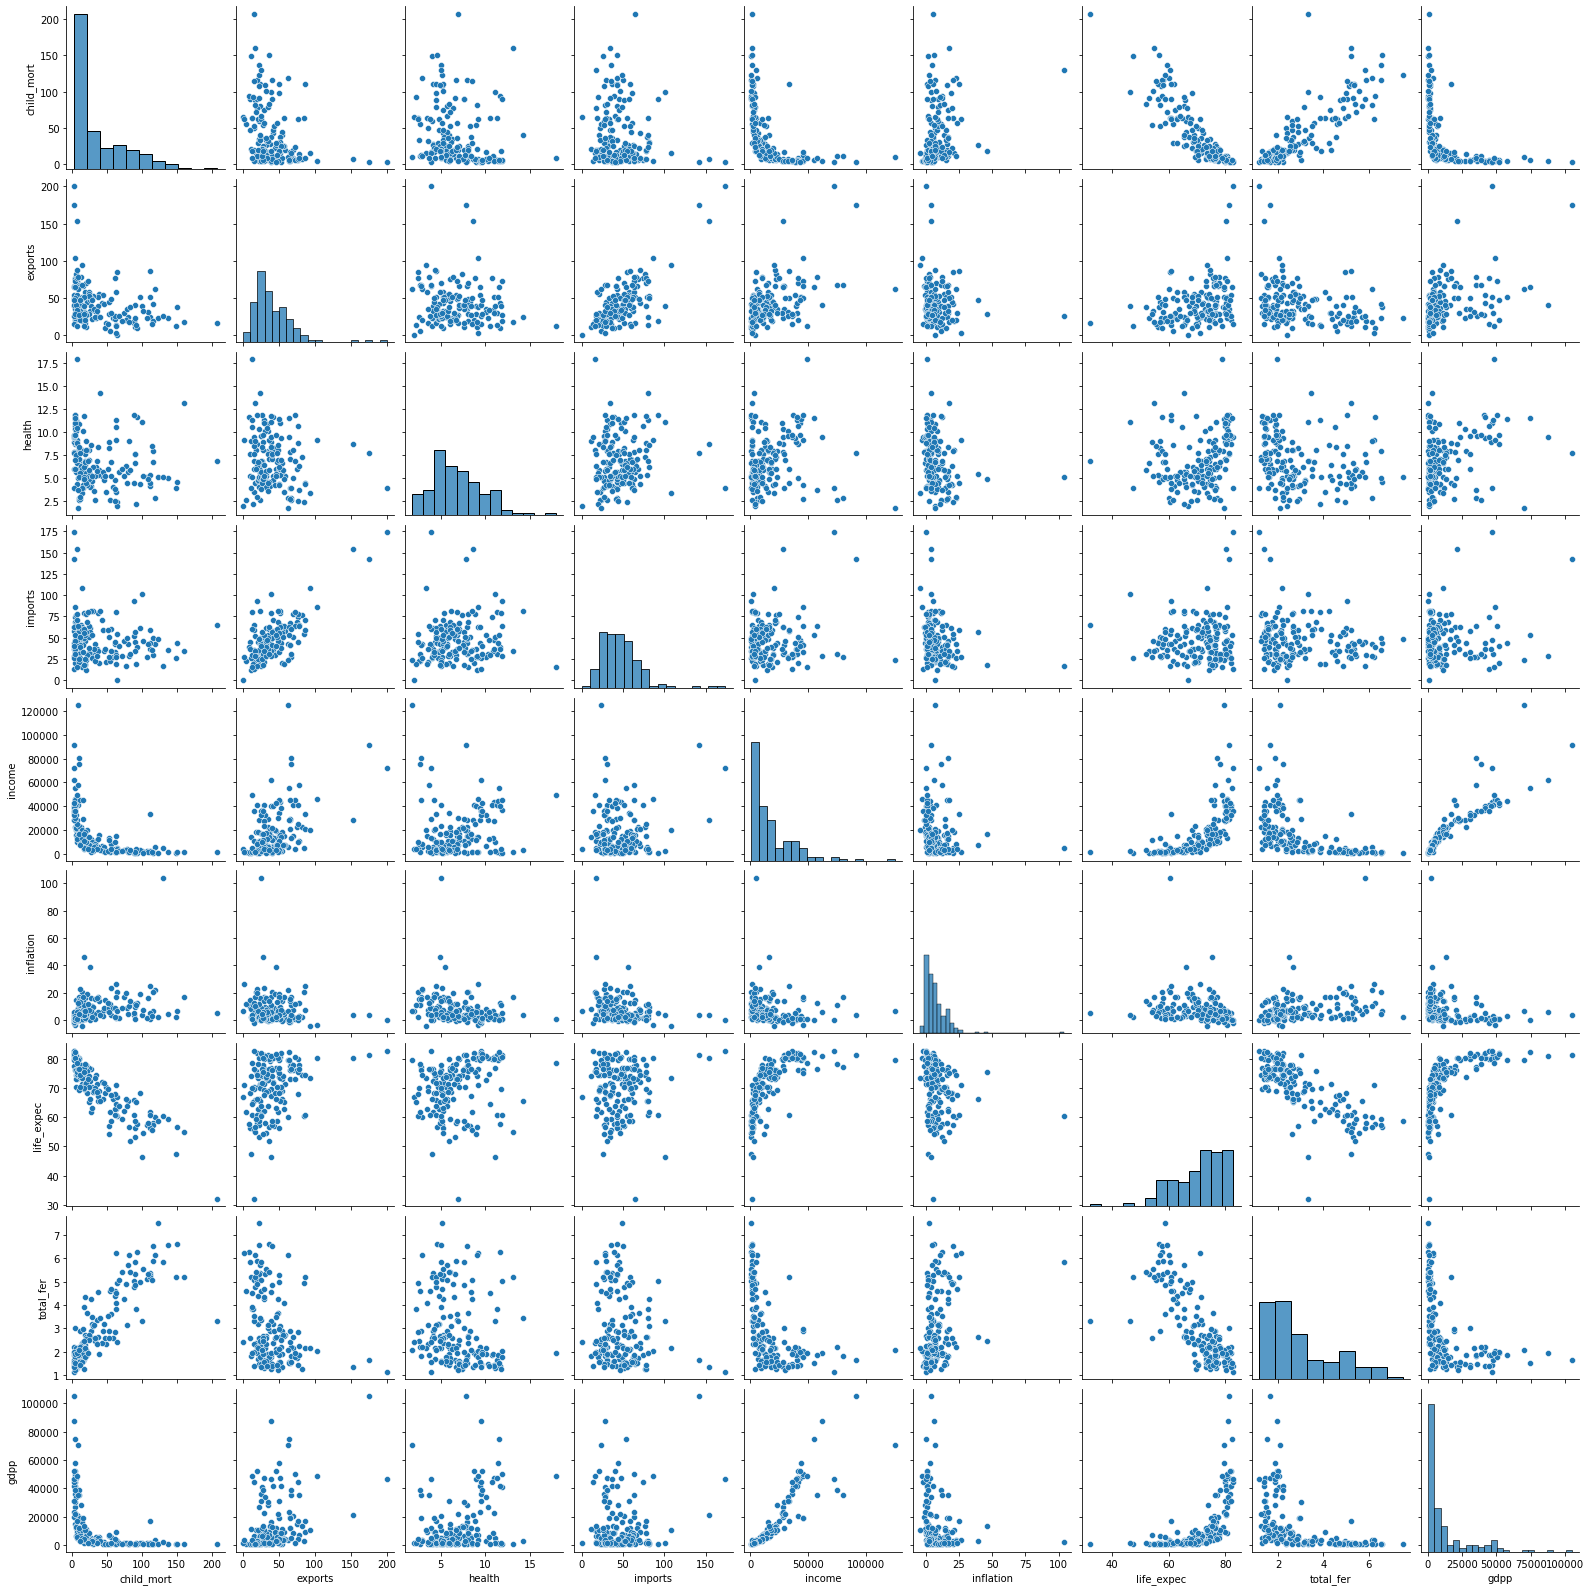

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.318093 -0.200402 -0.127211 -0.524315   0.288276   
exports      -0.318093  1.000000 -0.114408  0.737381  0.516784  -0.107294   
health       -0.200402 -0.114408  1.000000  0.095717  0.129579  -0.255376   
imports      -0.127211  0.737381  0.095717  1.000000  0.122406  -0.246994   
income       -0.524315  0.516784  0.129579  0.122406  1.000000  -0.147756   
inflation     0.288276 -0.107294 -0.255376 -0.246994 -0.147756   1.000000   
life_expec   -0.886676  0.316313  0.210692  0.054391  0.611962  -0.239705   
total_fer     0.848478 -0.320011 -0.196674 -0.159048 -0.501840   0.316921   
gdpp         -0.483032  0.418725  0.345966  0.115498  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.316313  -0.320011  0.418725  
health        0.210692  -0.196674  0.345966  
imports       0.054391  -0.159048  0.115498  
income        0.611962  -0.501840  0.895571  
inflation    -0.239705   0.316921 -0.221631  
life_expec    1.000000  -0.760875  0.600089  
total_fer    -0.760875   1.000000 -0.454910  
gdpp          0.600089  -0.454910  1.000000

<AxesSubplot:>

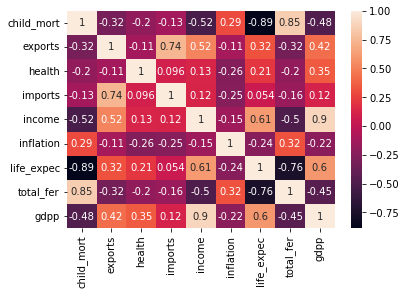

In [10]:
sns.heatmap(df.corr(), annot=True)

**Finding outliers and dropping them**

In [11]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

<AxesSubplot:xlabel='child_mort'>

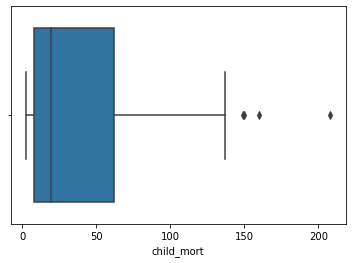

In [12]:
sns.boxplot(data=df, x='child_mort')

In [13]:
df[df['child_mort'] > 150]

country  child_mort  exports  health  imports  income  inflation  \
66          Haiti       208.0     15.3    6.91     64.7    1500       5.45   
132  Sierra Leone       160.0     16.8   13.10     34.5    1220      17.20   

     life_expec  total_fer  gdpp  
66         32.1       3.33   662  
132        55.0       5.20   399

In [14]:
df = df.drop([66, 132])

<AxesSubplot:xlabel='exports'>

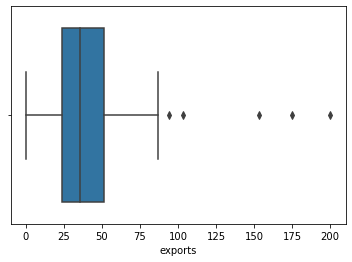

In [15]:
sns.boxplot(data=df, x='exports')

In [16]:
df[df['exports'] > 100]

country  child_mort  exports  health  imports  income  inflation  \
73      Ireland         4.2    103.0    9.19     86.5   45700     -3.220   
91   Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
98        Malta         6.8    153.0    8.65    154.0   28300      3.830   
133   Singapore         2.8    200.0    3.96    174.0   72100     -0.046   

     life_expec  total_fer    gdpp  
73         80.4       2.05   48700  
91         81.3       1.63  105000  
98         80.3       1.36   21100  
133        82.7       1.15   46600

In [17]:
df = df.drop([73, 91, 98, 133])

<AxesSubplot:xlabel='health'>

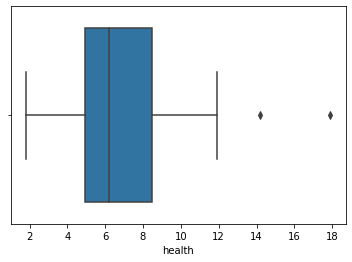

In [18]:
sns.boxplot(data=df, x='health')

In [19]:
df[df['health'] > 14]

country  child_mort  exports  health  imports  income  \
101  Micronesia, Fed. Sts.        40.0     23.5    14.2     81.0    3340   
159          United States         7.3     12.4    17.9     15.8   49400   

     inflation  life_expec  total_fer   gdpp  
101       3.80        65.4       3.46   2860  
159       1.22        78.7       1.93  48400

In [20]:
df = df.drop([101, 159])

<AxesSubplot:xlabel='imports'>

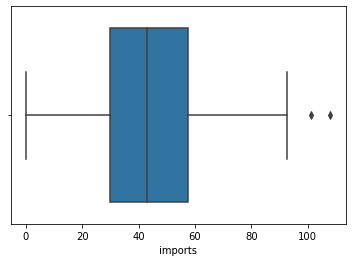

In [21]:
sns.boxplot(data=df, x='imports')

In [22]:
df[df['imports'] > 100]

country  child_mort  exports  health  imports  income  inflation  \
87      Lesotho        99.7     39.4    11.1    101.0    2380       4.15   
131  Seychelles        14.4     93.8     3.4    108.0   20400      -4.21   

     life_expec  total_fer   gdpp  
87         46.5       3.30   1170  
131        73.4       2.17  10800

In [23]:
df = df.drop([87, 131])

<AxesSubplot:xlabel='income'>

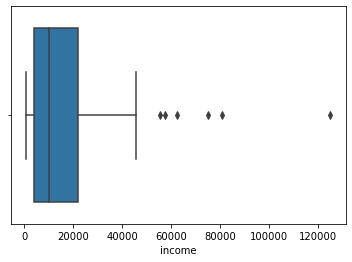

In [24]:
sns.boxplot(data=df, x='income')

In [25]:
df[df['income'] > 50000]

country  child_mort  exports  health  imports  income  \
23                 Brunei        10.5     67.4    2.84     28.0   80600   
82                 Kuwait        10.8     66.7    2.63     30.4   75200   
114                Norway         3.2     39.7    9.48     28.5   62300   
123                 Qatar         9.0     62.3    1.81     23.8  125000   
145           Switzerland         4.5     64.0   11.50     53.3   55500   
157  United Arab Emirates         8.6     77.7    3.66     63.6   57600   

     inflation  life_expec  total_fer   gdpp  
23      16.700        77.1       1.84  35300  
82      11.200        78.2       2.21  38500  
114      5.950        81.0       1.95  87800  
123      6.980        79.5       2.07  70300  
145      0.317        82.2       1.52  74600  
157     12.500        76.5       1.87  35000

In [26]:
df = df.drop([23, 82, 114, 123, 145, 157])

<AxesSubplot:xlabel='inflation'>

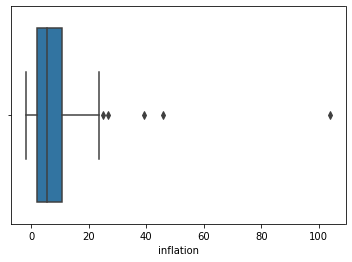

In [27]:
sns.boxplot(data=df, x='inflation')

In [28]:
df[df['inflation'] > 30]

country  child_mort  exports  health  imports  income  inflation  \
103   Mongolia        26.1     46.7    5.44     56.7    7710       39.2   
113    Nigeria       130.0     25.3    5.07     17.4    5150      104.0   
163  Venezuela        17.1     28.5    4.91     17.6   16500       45.9   

     life_expec  total_fer   gdpp  
103        66.2       2.64   2650  
113        60.5       5.84   2330  
163        75.4       2.47  13500

In [29]:
df = df.drop([103, 113, 163])

<AxesSubplot:xlabel='life_expec'>

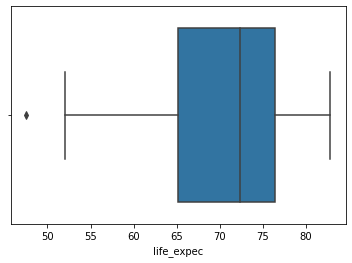

In [30]:
sns.boxplot(data=df, x='life_expec')

In [31]:
df[df['life_expec'] < 50]

country  child_mort  exports  health  imports  income  \
31  Central African Republic       149.0     11.8    3.98     26.5     888   

    inflation  life_expec  total_fer  gdpp  
31       2.01        47.5       5.21   446

In [32]:
df = df.drop(31)

<AxesSubplot:xlabel='total_fer'>

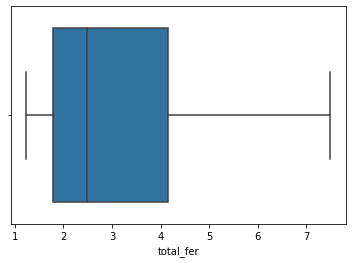

In [33]:
sns.boxplot(data=df, x='total_fer')

<AxesSubplot:xlabel='gdpp'>

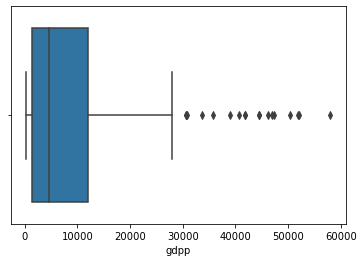

In [34]:
sns.boxplot(data=df, x='gdpp')

In [35]:
df[df['gdpp'] > 35000]

country  child_mort  exports  health  imports  income  inflation  \
7         Australia         4.8     19.8    8.73     20.9   41400      1.160   
8           Austria         4.3     51.3   11.00     47.8   43200      0.873   
15          Belgium         4.5     76.4   10.70     74.7   41100      1.880   
29           Canada         5.6     29.1   11.30     31.0   40700      2.870   
44          Denmark         4.1     50.5   11.40     43.6   44000      3.220   
53          Finland         3.0     38.7    8.95     37.4   39800      0.351   
54           France         4.2     26.8   11.90     28.1   36900      1.050   
58          Germany         4.2     42.3   11.60     37.1   40400      0.758   
68          Iceland         2.6     53.4    9.40     43.3   38800      5.470   
75            Italy         4.0     25.2    9.53     27.2   36200      0.319   
77            Japan         3.2     15.0    9.49     13.6   35800     -1.900   
110     Netherlands         4.5     72.0   11.90     63.6   45500      0.848   
144          Sweden         3.0     46.2    9.63     40.7   42900      0.991   
158  United Kingdom         5.2     28.2    9.64     30.8   36200      1.570   

     life_expec  total_fer   gdpp  
7          82.0       1.93  51900  
8          80.5       1.44  46900  
15         80.0       1.86  44400  
29         81.3       1.63  47400  
44         79.5       1.87  58000  
53         80.0       1.87  46200  
54         81.4       2.03  40600  
58         80.1       1.39  41800  
68         82.0       2.20  41900  
75         81.7       1.46  35800  
77         82.8       1.39  44500  
110        80.7       1.79  50300  
144        81.5       1.98  52100  
158        80.3       1.92  38900

In [36]:
df = df.drop([7, 8, 15, 29, 44, 53, 54, 58, 68, 75, 77, 110, 144, 158])

In [37]:
X = pd.get_dummies(df)

**Scaling the data using StandardScaler**

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
scaled_X = scaler.fit_transform(X)

**Here, I use the elbow/knee method to find the best K value**

In [41]:
from sklearn.cluster import KMeans

In [42]:
ssd = []

for k in range(1,15):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)

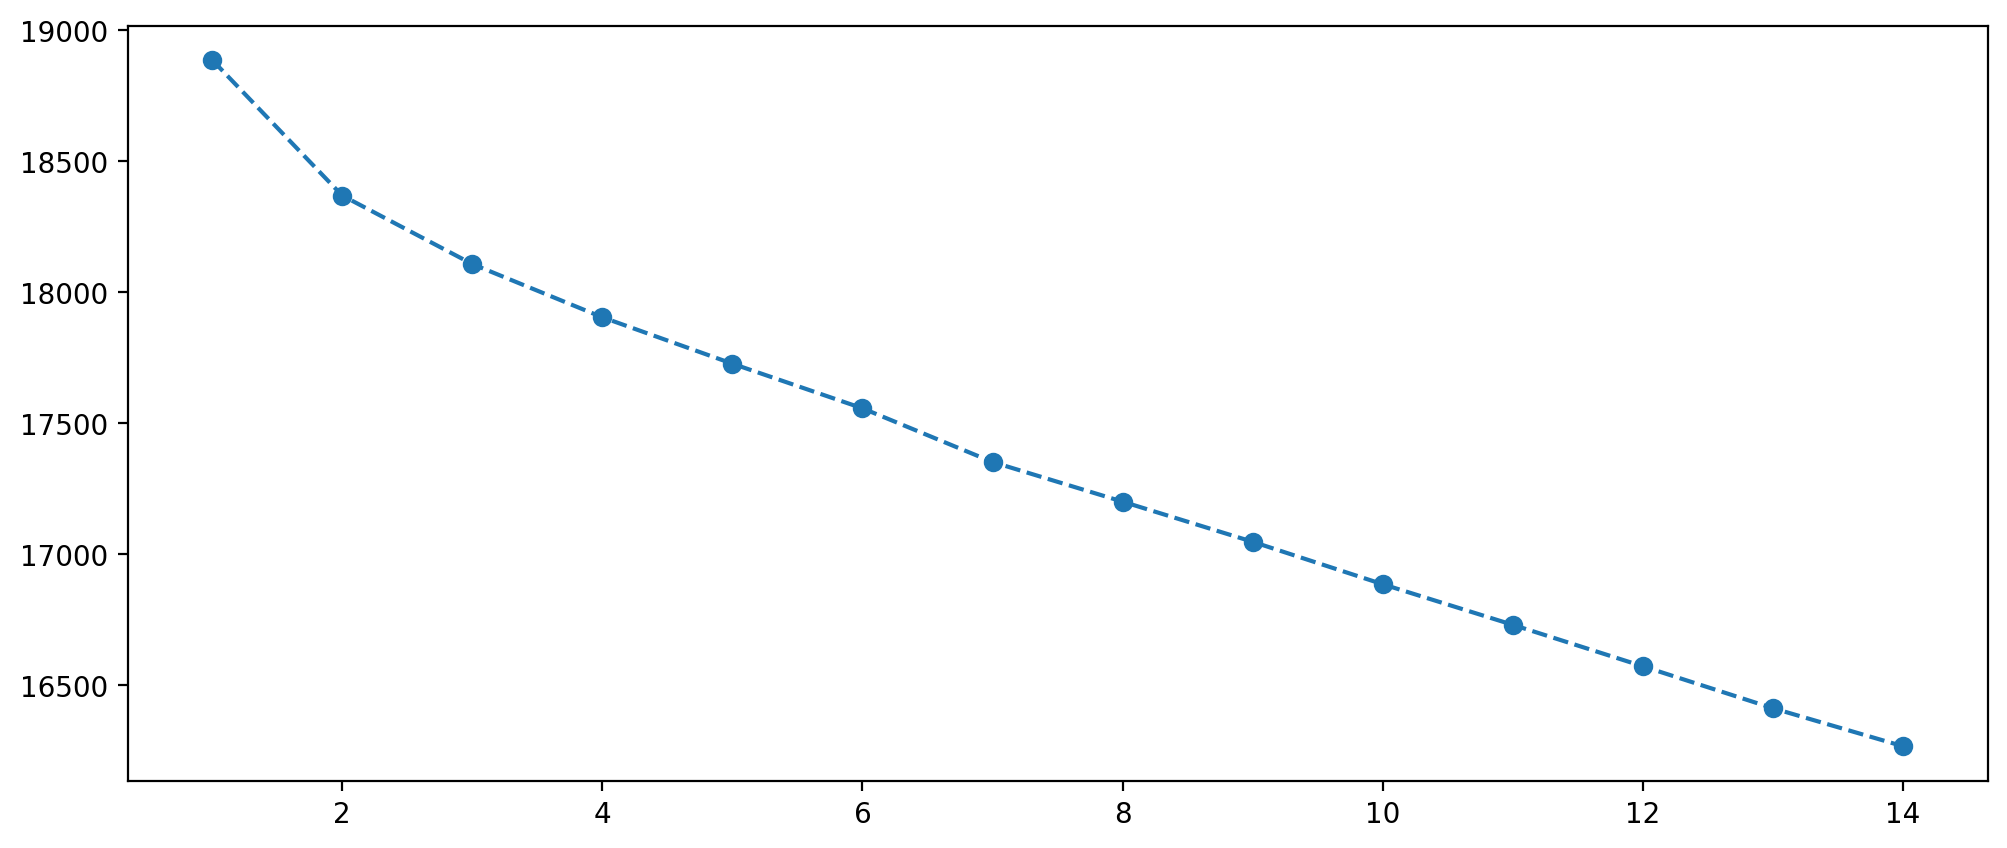

In [43]:
plt.figure(figsize=(12,5), dpi=200)
plt.plot(range(1,15), ssd, 'o--')

**After finding the best K value, I use it to create a final model.**

In [44]:
final_model = KMeans(n_clusters=2)

In [45]:
cluster_labels = final_model.fit_predict(scaled_X)

In [46]:
df['Cluster Labels'] = cluster_labels

In [47]:
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
161           Uzbekistan        36.3     31.7    5.81     28.5    4240   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  Cluster Labels  
0         9.44        56.2       5.82    553               1  
1         4.49        76.3       1.65   4090               0  
2        16.10        76.5       2.89   4460               0  
3        22.40        60.1       6.16   3530               1  
4         1.44        76.8       2.13  12200               0  
..         ...         ...        ...    ...             ...  
161      16.50        68.8       2.34   1380               0  
162       2.62        63.0       3.50   2970               0  
164      12.10        73.1       1.95   1310               0  
165      23.60        67.5       4.67   1310               1  
166      14.00        52.0       5.40   1460               1  

[133 rows x 11 columns]

In [48]:
categories_mean = df.groupby('Cluster Labels').mean()

In [49]:
categories_mean

child_mort    exports    health    imports        income  \
Cluster Labels                                                             
0                17.605882  42.282353  6.542706  47.215294  15378.470588   
1                81.720833  28.624979  6.029583  41.047206   3970.937500   

                inflation  life_expec  total_fer         gdpp  
Cluster Labels                                                 
0                6.045529   74.187059   2.166471  9260.423529  
1               10.201771   61.316667   4.795833  1897.104167

In [50]:
df['Cluster Labels'].loc[df['Cluster Labels'] == 1] = 'Help Needed'
df['Cluster Labels'].loc[df['Cluster Labels'] == 0] = 'Help Not Needed'

/var/folders/8q/hwngzqvx0871np5x0mj6_d9h0000gn/T/ipykernel_21233/1295189726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster Labels'].loc[df['Cluster Labels'] == 1] = 'Help Needed'


In [51]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [52]:
import plotly.express as px

In [53]:
import kaleido

In [54]:
fig = px.choropleth(df[['country', 'Cluster Labels']],
                    locationmode='country names',
                    locations='country',
                    title='Needed Help Per Country (World)',
                    color=df['Cluster Labels'],
                    color_discrete_map={'Help Needed':'Red',
                                        'Help Not Needed':'Green'})
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(legend_title_text='Labels',legend_title_side='top',title_pad_l=260,title_y=0.86)
fig.show(engine='kaleido')